In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import Work as bat

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('Data_Extract_From_Gender_Statistics.xlsx',
                         encoding = 'utf8').append(pd.read_excel('Data_Extract_From_Health_Nutrition_and_Population_Statistics.xlsx',
                                                                                                                  encoding='utf8')).append(pd.read_excel('Data_Extract_From_Millennium_Development_Goals.xlsx',
                                                                                                                  encoding='utf8')).append(pd.read_excel('Data_Extract_From_Health_Nutrition_and_Population_Statistics_by_Wealth_Quintile.xlsx',
                                                                                                                  encoding='utf8'))
df = bat.Clearing(df)
defen = pd.read_excel('Data_Extract_From_Gender_Statistics.xlsx', sheet_name=1, encoding = 'utf8').append(pd.read_excel('Data_Extract_From_Health_Nutrition_and_Population_Statistics.xlsx', sheet_name=1, encoding='utf8')).append(pd.read_excel('Data_Extract_From_Millennium_Development_Goals.xlsx', sheet_name=1, encoding='utf8'))

Before clear: 398541
After clear: 112610


In [16]:
def get_values(cnt, ind_names=False, codes=False):
    
    def values(codes, country=cnt):
        years_c = [item for ind, item in enumerate(np.array(df.columns)) if item not in ['Country Name', 'Country Code','Series Code','Series Name'] and item !='Mean' and item!='Region']
        X = df[(df['Country Code']==country) & (df['Series Code']==codes[0])][years_c].as_matrix()[0]
        Y = df[(df['Country Code']==country) & (df['Series Code']==codes[1])][years_c].as_matrix()[0]
        
        plt.plot([i for i in range(len(X))], X)
        plt.plot([i for i in range(len(Y))], Y)
        plt.legend((defen[(defen['Code']==codes[0])]['Indicator Name'].as_matrix()[0], defen[(defen['Code']==codes[1])]['Indicator Name'].as_matrix()[0]), 
                   loc=1)
        plt.rcParams["figure.figsize"] = [16,9]
        
        print ('Standart deviation: ', np.std(X), np.std(Y))
        print ('Pearson-r and p-value: ', sts.pearsonr(X,Y))
        return X,Y
    
    if ind_names != False:
        codes = [defen[(defen['Indicator Name']==ind_names[0])]['Code'].as_matrix()[0], defen[(defen['Indicator Name']==ind_names[1])]['Code'].as_matrix()[0]]
        return values(codes), codes
    else:
        return values(codes), codes

Standart deviation:  1.8251611848272058 0.9105998166546272
Pearson-r and p-value:  (-0.9999058461453862, 1.005617911756195e-23)


((array([42.39591909, 41.66422893, 40.8296512 , 40.31476379, 39.65662437,
         39.07341394, 38.77645789, 38.84552894, 39.29135563, 40.11191543,
         41.18525502, 42.34597562, 43.51580465, 45.10119152]),
  array([70.22673181, 70.58945011, 71.00777384, 71.26833778, 71.60419373,
         71.90446911, 72.05833153, 72.02248442, 71.79196422, 71.37151716,
         70.82892616, 70.25137099, 69.67873708, 68.91742134])),
 ['SP.POP.DPND', 'SP.POP.1564.TO.ZS'])

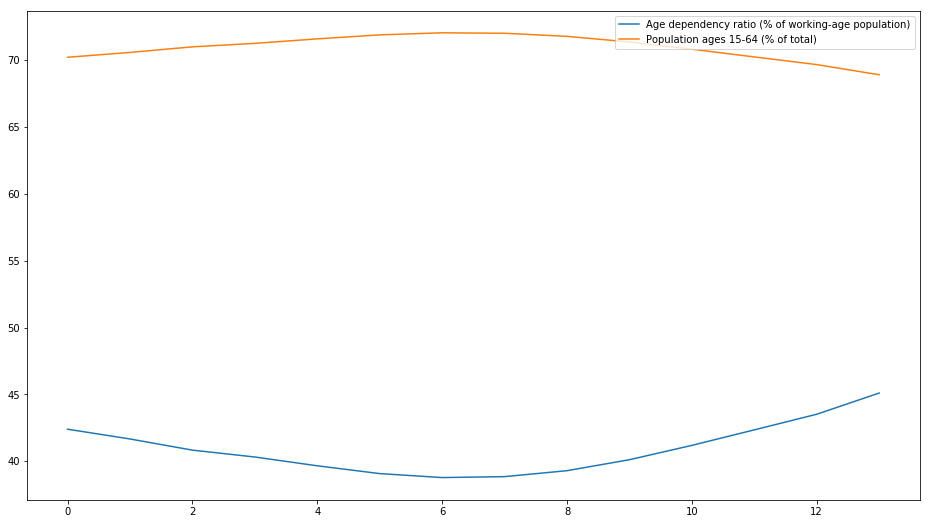

In [17]:
get_values('RUS', ind_names=['Age dependency ratio (% of working-age population)','Population ages 15-64 (% of total)'])

Standart deviation:  1.2461550935930406 1.2461550674342312
Pearson-r and p-value:  (-0.999999999998225, 4.515628585558146e-70)


((array([24.31999969, 24.13999939, 24.        , 23.35000038, 22.45000076,
         22.13999939, 22.54000092, 22.56999969, 21.80999947, 20.95000076,
         20.72999954, 21.02000046, 20.87999916, 20.90999985]),
  array([75.68000031, 75.86000061, 76.        , 76.65000153, 77.55000305,
         77.86000061, 77.45999908, 77.43000031, 78.19000244, 79.05000305,
         79.26999664, 78.98000336, 79.12000275, 79.08999634])),
 ['SL.EMP.SELF.MA.ZS', 'SL.EMP.WORK.MA.ZS'])

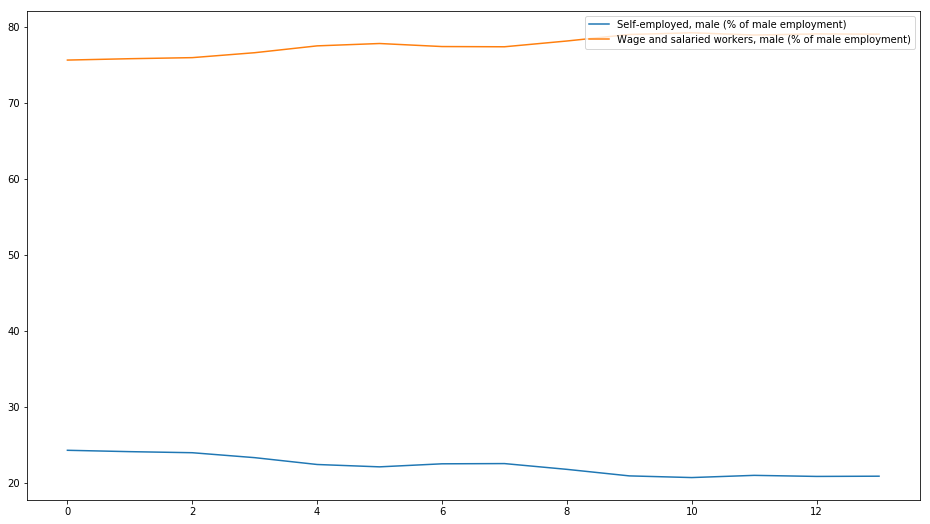

In [18]:
get_values('AUS', codes=['SL.EMP.SELF.MA.ZS', 'SL.EMP.WORK.MA.ZS'])